<a href="https://colab.research.google.com/github/Tarde98/DataScienceI/blob/main/ProyectoDSParteITardella.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Proyecto DSI Data set de Autos Electricos descargados de Kaggle**


En este dataset se almacenan datos sobre la población de autos eléctricos en Estados Unidos. El objetivo de este análisis es obtener información relevante que permita comprender mejor la evolución de este tipo de vehículos. La elección de este dataset se debe a que cumple con las características requeridas para el proyecto final y, además, incluye columnas con fechas y distintos tipos de datos que facilitan la realización de un estudio completo.

Resulta interesante plantear una pregunta central para guiar el análisis: ¿La autonomía de los autos eléctricos continuará mejorando en los próximos años?. Esta duda surge a partir del hecho de que los autos eléctricos representaron en su momento un gran avance tecnológico y fueron considerados una de las principales alternativas para reducir el uso de combustibles fósiles como el petróleo y sus derivados.

Sin embargo, es importante tener en cuenta que el costo de estos vehículos sigue siendo superior al de los autos a combustión, y su adopción a nivel mundial no es uniforme. Su desarrollo se concentra principalmente en países del primer mundo, donde existe la infraestructura adecuada para impulsar tanto la producción como el uso cotidiano de esta tecnología.

Otro punto de interés dentro de este análisis es observar si los esfuerzos por ampliar la autonomía de los autos eléctricos se mantienen como una prioridad. En la actualidad, también se están explorando otras fuentes de energía alternativas, como el hidrógeno, que podrían competir o incluso complementar a la movilidad eléctrica.

En resumen, este dataset ofrece una base sólida para evaluar tendencias, identificar avances en la autonomía y comprender hacia dónde se dirige el futuro de los autos eléctricos.

Planteemos ahora una HIPOTESIS NULA para poder plantear una alternativa al final del análisis.

**Hipotesis nula: No existe una relación entre el año del modelo del auto y la autonomía eléctrica del mismo.**

Primero guardamos la url del dataSet que guardamos en el repositorio de GitHub

In [ ]:
#url = 'https://raw.githubusercontent.com/Tarde98/DataSciendeI/refs/heads/main/dataSet.csv'
#url ='https://raw.githubusercontent.com/Tarde98/DataScienceI/refs/heads/main/dataSetGrande.csv'
url = 'https://raw.githubusercontent.com/Tarde98/DataScienceI/refs/heads/main/dataSetXL.csv'

Importamos las librerias de Numpy, Pandas y MatPlotLib



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Mostramos el .csv como data frame

In [ ]:
df = pd.read_csv(url)
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1N4BZ0CP5G,King,Seattle,WA,98125.0,2016.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,46.0,349455557.0,POINT (-122.30253 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,KNDJX3AEXG,King,Renton,WA,98058.0,2016.0,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93.0,31950.0,11.0,210641315.0,POINT (-122.08747 47.4466),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
2,5YJ3E1EB2J,King,Seattle,WA,98115.0,2018.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,43.0,171417494.0,POINT (-122.31676 47.68156),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,1C4RJXN64R,Kitsap,Bremerton,WA,98312.0,2024.0,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,26.0,262542927.0,POINT (-122.65223 47.57192),PUGET SOUND ENERGY INC,5.303508e+10
4,5YJ3E1EB1J,Thurston,Olympia,WA,98512.0,2018.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,35.0,110432815.0,POINT (-122.9131 47.01359),PUGET SOUND ENERGY INC,5.306701e+10


Tamaño del data frame, en donde, filas x columnas

In [ ]:
#Al realizar la observacion y validar los datos de autonomía con Google nso percatamos de que la comuna de autonomía electrica o Electric Range está en millas.
#La convertimos a kilometros

df['Electric Range'] = (df['Electric Range'] * 1.60934).round(2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89116 entries, 0 to 89115
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN (1-10)                                         89116 non-null  object 
 1   County                                             89089 non-null  object 
 2   City                                               89089 non-null  object 
 3   State                                              89090 non-null  object 
 4   Postal Code                                        89089 non-null  float64
 5   Model Year                                         89090 non-null  float64
 6   Make                                               89090 non-null  object 
 7   Model                                              89090 non-null  object 
 8   Electric Vehicle Type                              89090 non-null  object 
 9   Clean 

Revisamos si el dataSet contiene algunos valores nulos

In [ ]:
# Contar valores nulos por columna
print("Conteo de valores nulos por columna:")
print(df.isnull().sum())

# Calcular el porcentaje de valores nulos por columna
print("\nPorcentaje de valores nulos por columna:")
print((df.isnull().sum() / len(df)) * 100)

Conteo de valores nulos por columna:
VIN (1-10)                                            0
County                                               27
City                                                 27
State                                                26
Postal Code                                          27
Model Year                                           26
Make                                                 26
Model                                                26
Electric Vehicle Type                                26
Clean Alternative Fuel Vehicle (CAFV) Eligibility    26
Electric Range                                       34
Base MSRP                                            34
Legislative District                                 30
DOL Vehicle ID                                       26
Vehicle Location                                     27
Electric Utility                                     27
2020 Census Tract                                    27
dtype: int6

En este caso como los valores nulos son muy pocos (27 dentro de 90000 registros) voy a optar el metodo de eliminar los valores nulos de mi data set para hacer un estudio más correcto del mismo, ya que, no puedo ponerle media, mediana o algún valor calculado porque, por ejemplo, cada auto tiene su autonomía o año de salida especifico.

In [ ]:
dfSinNulos = df.copy()

# Eliminar filas con cualquier valor NaN
dfSinNulos.dropna(axis=0, inplace=True)

# Contar valores nulos por columna
print("Conteo de valores nulos por columna:")
print(dfSinNulos.isnull().sum())

# Calcular el porcentaje de valores nulos por columna
print("\nPorcentaje de valores nulos por columna:")
print((dfSinNulos.isnull().sum() / len(dfSinNulos)) * 100)

Conteo de valores nulos por columna:
VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

Porcentaje de 

Uso la función .describe para ver rápidamente una vista previa de los valores numéricos que se hayan en el df

In [ ]:
dfSinNulos.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,89078.000000,89078.000000,89078.000000,89078.000000,89078.000000,8.907800e+04,8.907800e+04
mean,98190.158603,2021.585958,72.542512,747.926649,32.206617,2.378497e+08,5.303451e+10
std,230.251970,2.988599,133.908006,6861.769561,14.288105,6.783722e+07,1.299593e+07
min,98001.000000,2000.000000,0.000000,0.000000,1.000000,4.469000e+03,5.300396e+10
25%,98034.000000,2020.000000,0.000000,0.000000,21.000000,2.083016e+08,5.303301e+10
50%,98108.000000,2023.000000,0.000000,0.000000,36.000000,2.551521e+08,5.303302e+10
75%,98199.000000,2024.000000,61.150000,0.000000,45.000000,2.723627e+08,5.303303e+10
max,99403.000000,2026.000000,542.350000,184400.000000,49.000000,4.789259e+08,5.307794e+10


Con esto podemos ver que la media de autos electricos es de 2021, que el más antiguo es el del 2000 y que el más nuevo es de 2026. Otro dato interesante es que el rango electrico mediano es de 55 kms.

Me fijo que tipo de datos es el rango electrico

In [ ]:
print(dfSinNulos['Electric Range'].dtype)

float64


Es un float por lo tanto puedo comprar para traer los autos que tengan menos de 30kms de autonomía electrica

In [ ]:
autonomia30 = dfSinNulos.loc[(dfSinNulos['Electric Range']<30) & ((dfSinNulos['Electric Range']!= 0))] #Filtro por las filas que cumplan la condicion de Rango Electrico < 30kms
#tambien quito los que estan en 0 ya que puede ser por un problema de recopilación de datos del dataset

print('Cantidad de autos con menor autonimia a 30 kms: ',autonomia30.shape[0])

autonomia30.head() #Listo los registros que quedaron

Cantidad de autos con menor autonimia a 30 kms:  2379


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
21,WP1AE2A25G,Kitsap,Seabeck,WA,98380.0,2016.0,PORSCHE,CAYENNE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22.53,0.0,35.0,187199456.0,POINT (-122.81585 47.64509),PUGET SOUND ENERGY INC,5.303509e+10
29,WBA8E1C3XH,Snohomish,Everett,WA,98208.0,2017.0,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22.53,44100.0,44.0,247400478.0,POINT (-122.18637 47.89251),PUGET SOUND ENERGY INC,5.306104e+10
57,WBAJB1C56J,Snohomish,Lake Stevens,WA,98258.0,2018.0,BMW,530E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22.53,54950.0,44.0,194021208.0,POINT (-122.06402 48.01497),PUGET SOUND ENERGY INC,5.306105e+10
80,5UXKT0C58J,Thurston,Olympia,WA,98501.0,2018.0,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20.92,0.0,22.0,187270233.0,POINT (-122.89165 47.03954),PUGET SOUND ENERGY INC,5.306701e+10
87,WA1E2AFY0M,Thurston,Olympia,WA,98512.0,2021.0,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,28.97,0.0,35.0,144870743.0,POINT (-122.9131 47.01359),PUGET SOUND ENERGY INC,5.306701e+10


Reviso los detalles del auto año 2000 que vimos en el resumen con el .describe que ya estaban en circulación para ver cual es

In [ ]:
auto_mas_antiguo = dfSinNulos.loc[(dfSinNulos['Model Year']==2000)]
auto_mas_antiguo.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
43,1FTZR0816Y,King,Shoreline,WA,98133.0,2000.0,FORD,RANGER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93.34,0.0,32.0,205243356.0,POINT (-122.35029 47.71871),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303302e+10
27007,1FTZR0819Y,King,Shoreline,WA,98133.0,2000.0,FORD,RANGER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93.34,0.0,32.0,9440952.0,POINT (-122.35029 47.71871),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303302e+10
59284,1FTZR0817Y,King,Seattle,WA,98117.0,2000.0,FORD,RANGER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93.34,0.0,36.0,142611402.0,POINT (-122.38418 47.70044),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10


Podemos ver cuantos autos por marca hay en el dataset. Gracias a eso podemos ver que Tesla es el más y menos vendido.

In [ ]:
auto_por_marca = dfSinNulos.groupby('Make')['VIN (1-10)'].count() #usamos groupby para agrupar por marca contando un valor unico como el VIN (Vehicle Identification Number)
marcas_mas_vendidos = auto_por_marca.sort_values( ascending=False).head(10) #Guardo los primeros 10 más vendidos
marcas_menos_vendidos = auto_por_marca.sort_values( ascending=False).tail(10) #Guardo los 10 nemos vendidos

pd.concat([marcas_mas_vendidos, marcas_menos_vendidos]) #Los concateno para mostrar en un solo dataFrame que sirva de vistazo para la estadistica

,VIN (1-10)
Make,
TESLA,38760
CHEVROLET,5952
NISSAN,5815
KIA,4228
BMW,4148
FORD,4027
TOYOTA,3466
HYUNDAI,2981
RIVIAN,2644


Podemos visualizar la información en una grafico de torta

In [ ]:
top5_vendidos = auto_por_marca.sort_values( ascending=False).head(5)
top5_vendidos


,VIN (1-10)
Make,
TESLA,38760
CHEVROLET,5952
NISSAN,5815
KIA,4228
BMW,4148


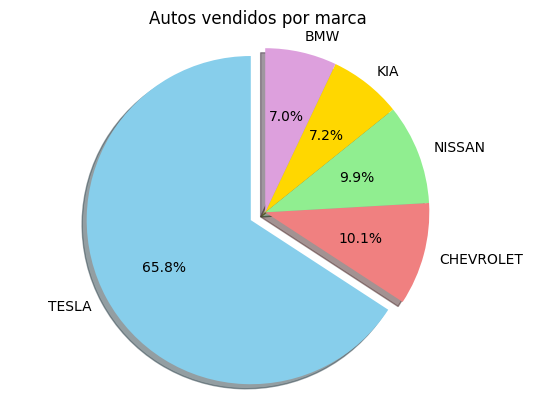

In [ ]:
etiquetas_pie = top5_vendidos.index #Ubico las marcas en las etiquetas del piechart

porcentajes = (top5_vendidos / top5_vendidos.sum()) * 100 #Calculo los porcentajes en base al total

colores_pie = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'plum']

explode = [0.1 if i == top5_vendidos.argmax() else 0 for i in range(len(top5_vendidos))] #Destacamos la porcion más grande

#Creamos el grafico
fig, ax = plt.subplots()
ax.pie(porcentajes, explode=explode, labels=etiquetas_pie, colors=colores_pie,
       autopct='%1.1f%%', shadow=True, startangle=90)

ax.axis('equal')
ax.set_title("Autos vendidos por marca")
plt.show()


Ya que vemos que TESLA es la marca más vendida, veamos que modelos son los que se vendieron

In [ ]:
autos_tesla = dfSinNulos.loc[(dfSinNulos['Make']=='TESLA')] #Apartamos las filas en donde la marca sea TESLA
cantidad_modelo_tesla = autos_tesla.groupby('Model')['VIN (1-10)'].count() #usamos groupby para agrupar por modelo contando un valor unico como el VIN (Vehicle Identification Number)
cantidad_modelo_tesla.sort_values( ascending=False) #Listamos ordenando de mayor a menor los modelos vendidos por la marca tesla


,VIN (1-10)
Model,
MODEL Y,19137
MODEL 3,13692
MODEL S,2866
MODEL X,2587
CYBERTRUCK,460
ROADSTER,18


Miremos ahora el promedio del año del modelo por marca y los ordenamos para saber cuales son las marcas que más se compran en los últimos años

In [ ]:
anio_por_marca = dfSinNulos.groupby('Make')['Model Year'].mean().astype(int) #Calculo la media y lo guardo como entero ya que son años
anio_por_marca.sort_values( ascending=False).head(10)

,Model Year
Make,
ACURA,2024
ALFA ROMEO,2024
DODGE,2024
LAMBORGHINI,2024
GMC,2024
MULLEN AUTOMOTIVE INC.,2024
RAM,2024
ROLLS-ROYCE,2024
VINFAST,2024


Ahora vamos a trabajar con series de tiempo. Veamos como fue variando la población de autos electricos a traves del tiempo. Para esto deberíamos saber en que rango de años de manejan nuestros datos. Lo averiguamos rapidamente de la siguiente manera:

In [ ]:
dfSinNulos['Model Year'].unique()

array([2016., 2018., 2024., 2015., 2019., 2020., 2012., 2013., 2022.,
       2023., 2017., 2014., 2021., 2000., 2025., 2011., 2026., 2010.,
       2008., 2002.])

Con esta información ya podemos comenzar a trabajar

In [ ]:
serie_anual = pd.date_range(start='2016', end='2026', freq = 'YE') #Creamos una serie de tiempo por años

dfSinNulos['Fecha'] = pd.to_datetime(dfSinNulos['Model Year'], format='%Y') #Con esto nos aseguramos de que todas las filas de la columna estén en formato AÑO para la fecha

cant_por_anio = dfSinNulos.set_index('Fecha').resample('YE').size() #Contamos la cantidad de autos por año

cant_por_anio


,0
Fecha,
2000-12-31,3
2001-12-31,0
2002-12-31,1
2003-12-31,0
2004-12-31,0
2005-12-31,0
2006-12-31,0
2007-12-31,0
2008-12-31,5


Sabiendo las cantidades ahora lo podemos volcar a la serie de tiempo

In [ ]:
cant_por_anio = cant_por_anio.reindex(serie_anual, fill_value=0)
cant_por_anio


,0
2016-12-31,1985
2017-12-31,3068
2018-12-31,5374
2019-12-31,3993
2020-12-31,4440
2021-12-31,7565
2022-12-31,10693
2023-12-31,21584
2024-12-31,17104
2025-12-31,7970


Lo vemos visualmente utilizando MatPlotLib

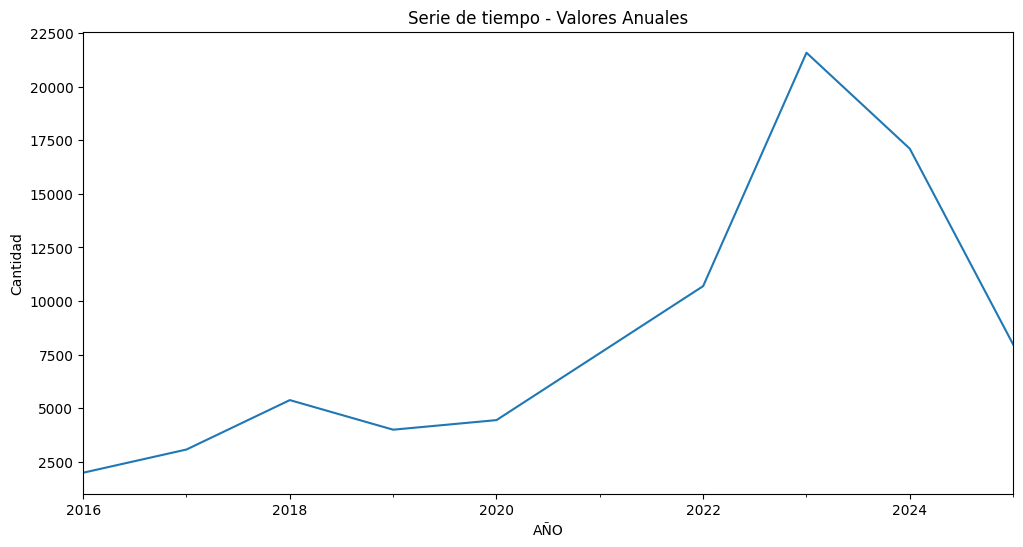

In [ ]:
cant_por_anio.plot(title='Serie de tiempo - Valores Anuales',figsize =(12,6))
plt.xlabel('AÑO')
plt.ylabel('Cantidad')
plt.show()

De esta manera gracias al gráfico podemos darnos cuenta que los modelos más vendidos de autos eléctricos son del 2023

Ahora, veamos el mismo gráfico hecho con una interfaz orientada a objetos

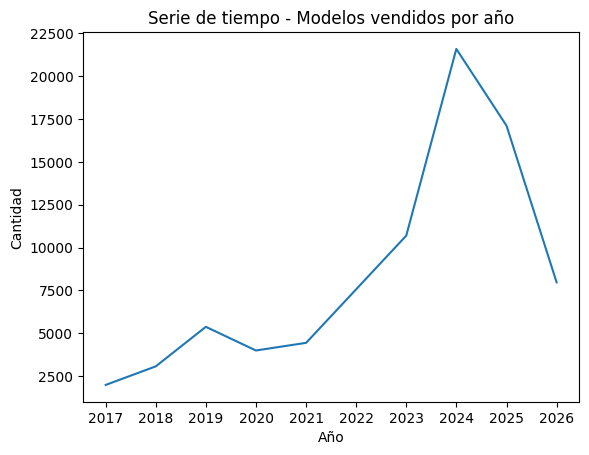

In [ ]:
x = serie_anual
y = cant_por_anio

fig, ax = plt.subplots()

ax.plot(x, y)
ax.set_xlabel("Año")
ax.set_ylabel("Cantidad")
ax.set_title("Serie de tiempo - Modelos vendidos por año")

plt.show()

Veamos ahora un histograma estudiando la autonomía electrica de la población de autos. Primero necesitamos guardar dicha columna para poder estudiarla.

In [ ]:
#Traemos las diferentes autonomías de los vehiculos mientras estas sean mayor que 0 y diferente a nulo
df_autonomia = dfSinNulos.loc[(dfSinNulos['Electric Range']>0) & ((df['Electric Range'].notna()))]
autonomiaE = df_autonomia['Electric Range']
autonomiaE.head(5)

,Electric Range
0,135.18
1,149.67
2,346.01
3,33.80
4,346.01


Teniendo ya purgado el dato de la columna, lo volcamos a un histograma

Text(0.5, 1.0, 'Histograma de autonomía eléctrica')

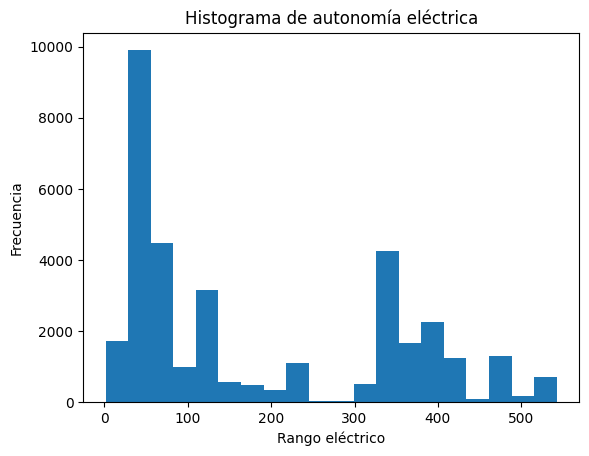

In [ ]:
plt.hist(autonomiaE,bins=20)
plt.xlabel('Rango eléctrico')
plt.ylabel('Frecuencia')
plt.title('Histograma de autonomía eléctrica')

Con el histograma podemos ver que el rango de autonomía más utilizado es 50kms (similar al valor que nos daba la media al comienzo del proyecto)

Podemos ver un grafico de cajas también con respecto a la autonomía por año del modelo.

/tmp/ipython-input-728782841.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_autonomia, x='Model Year', y='Electric Range', palette='Set2') #Usamos un df que filtramos anteriormente para no traer autonomias = 0 o nulas


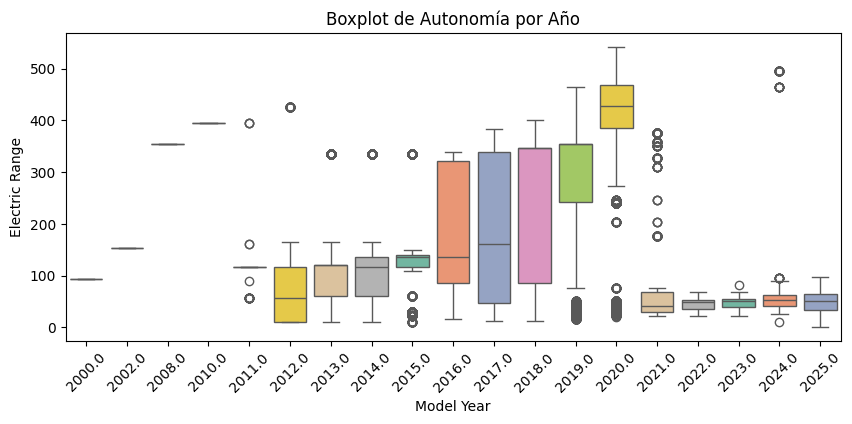

In [ ]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=df_autonomia, x='Model Year', y='Electric Range', palette='Set2') #Usamos un df que filtramos anteriormente para no traer autonomias = 0 o nulas
plt.title('Boxplot de Autonomía por Año')
plt.xticks(rotation=45)
plt.show()

Este gráfico nos muestra que la autonomía por modelo fue creaciendo hasta el 2020

Veamos cuales son los outliers del año 2021 para comprender por que hay demasiados fuera de la caja del boxplot

In [ ]:

df_2021 = df_autonomia[df_autonomia["Model Year"] == 2021] # Traigo del df de autonomía los valores de modelos 2021

#Calculo los cuartiles
Q1 = df_2021["Electric Range"].quantile(0.25)
Q3 = df_2021["Electric Range"].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

#Muestro los outliers que solamente se encuentres por sobre el limite superior
outliers_2021 = df_2021[
    (df_2021["Electric Range"] > limite_superior)
]

outliers_2021

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Fecha
42,LPSED3KA7M,King,Seatac,WA,98148.0,2021.0,POLESTAR,PS2,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,374.98,0.0,33.0,271756775.0,POINT (-122.32863 47.46233),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10,2021-01-01
111,WBY8P4C0XM,King,Seattle,WA,98122.0,2021.0,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,202.78,0.0,37.0,148917177.0,POINT (-122.31009 47.60803),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,2021-01-01
128,WP0AB2Y1XM,Spokane,Spokane,WA,99203.0,2021.0,PORSCHE,TAYCAN,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,326.70,0.0,6.0,276495068.0,POINT (-117.39322 47.63374),MODERN ELECTRIC WATER COMPANY,5.306300e+10,2021-01-01
140,WMWXP3C01M,King,Issaquah,WA,98029.0,2021.0,MINI,HARDTOP,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,177.03,0.0,5.0,106927096.0,POINT (-122.00292 47.54748),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10,2021-01-01
182,WMWXP3C02M,Island,Clinton,WA,98236.0,2021.0,MINI,HARDTOP,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,177.03,0.0,10.0,132858897.0,POINT (-122.35803 47.9796),PUGET SOUND ENERGY INC,5.302997e+10,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86107,WP0AC2Y19M,King,Bellevue,WA,98004.0,2021.0,PORSCHE,TAYCAN,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308.99,0.0,41.0,267221412.0,POINT (-122.1872 47.61001),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10,2021-01-01
86126,LPSED3KA3M,King,Seattle,WA,98144.0,2021.0,POLESTAR,PS2,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,374.98,0.0,37.0,152530262.0,POINT (-122.30866 47.57874),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,2021-01-01
86793,WMWXP3C01M,Snohomish,Everett,WA,98208.0,2021.0,MINI,HARDTOP,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,177.03,0.0,44.0,144445164.0,POINT (-122.18637 47.89251),PUGET SOUND ENERGY INC,5.306104e+10,2021-01-01
87723,WP0AB2Y14M,King,Seattle,WA,98136.0,2021.0,PORSCHE,TAYCAN,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,326.70,0.0,34.0,153957926.0,POINT (-122.38415 47.53755),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,2021-01-01


Usemos el histograma para ver la distribución de los valores que estamos analizando

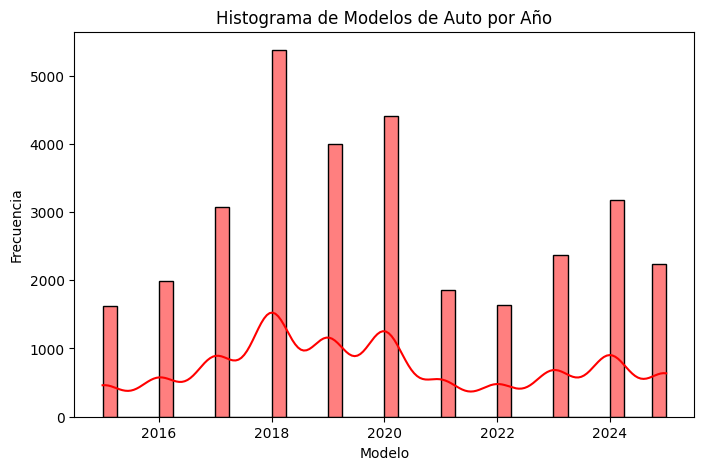

In [ ]:
plt.figure(figsize=(8, 5))
df_filtrado = df_autonomia[df_autonomia['Model Year'] > 2014] #Filtro solamente los de 2014 para adelante porque el resto son pocos y hace menos legible el gráfico para lo que estamos estudiando
sns.histplot(data=df_filtrado, x='Model Year', kde=True, color='red')

plt.title('Histograma de Modelos de Auto por Año')
plt.xlabel('Modelo')
plt.ylabel('Frecuencia')
plt.show()

Podemos ver con este histograma que las cantidades no son exageradamente diferentes lo que le da un poco más de valides al análisis

Con esto confirmamos que verdaderamente hay valores fuera de los valores utilizados para contruir el boxplot para el modelo 2021

## **CONCLUSIÓN**

Según lo que pudimos ver, a medida que el modelo de autos es más nuevo, menos autonomía electrica tiene (luego del 2020). Entonces, podemos armar la siguiente hipotesis alternativa:

**Hipotesis Alternativa: Más nuevo es el modelo del auto eléctrico, menor es su autonomía electrica.**

### FIN DEL DOCUMENTO